## Metoda Walidacji Krzyżowej

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from __future__ import print_function
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Zadanie 1 

Znajdź optymalny klasyfikator dla sztucznie wygnerowanych danych z wykorzystaniem `datasets.make_circles`. W tym celu przeszukaj przestrzeń hiperparametrów dla klasyfikatorów kNN i SVM.

Na wykresach zwizualizuj działanie obu znalezionych klasyfikatorów.

In [105]:
circles_data, circles_targets = datasets.make_circles(n_samples=1000, factor=.15, noise=.25, random_state=12 )


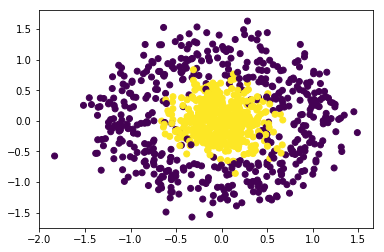

In [106]:
plt.scatter(circles_data[:,0], circles_data[:,1],c = np.ravel(circles_targets))

In [107]:

### BEGIN SOLUTION

X = circles_data

#Wektor poprawnej klasyfikacji obiektów
y = circles_targers
y = np.array(y)


#Dzielimy losowo zbiór na dwie części
train, test, train_targets, test_targets = train_test_split(X, y,
                                 test_size=0.30, random_state=1234)



scaler = preprocessing.StandardScaler(with_std = True)
scaler.fit(train)


standard_train = scaler.transform(train)
standard_test = scaler.transform(test)

k = np.arange(20)+1
tuned_parameters = {'n_neighbors': k}

clf = GridSearchCV(KNeighborsClassifier(n_jobs=4), tuned_parameters, cv=5)
clf.fit(standard_train, train_targets)

print("METODA kNN")
print("Zestaw najlepszych parametrów:")
print()
print(clf.best_params_)
print()
print ("Błąd: ", clf.best_score_)
print()
print("Wyniki")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) dla %r"
            % (mean, std * 2, params))
print()

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(standard_train, train_targets)

print("METODA SVM")
print("Zestaw najlepszych parametrów:")
print()
print(clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
amax = np.argmax(means)
print ("Błąd: ", clf.best_score_)
print()
print("Wyniki")
print()

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) dla %r"
            % (mean, std * 2, params))
print()

### END SOLUTION


METODA kNN
Zestaw najlepszych parametrów:

{'n_neighbors': 19}

Błąd:  0.9485714285714286

Wyniki

0.924 (+/-0.021) dla {'n_neighbors': 1}
0.920 (+/-0.045) dla {'n_neighbors': 2}
0.934 (+/-0.024) dla {'n_neighbors': 3}
0.936 (+/-0.029) dla {'n_neighbors': 4}
0.943 (+/-0.018) dla {'n_neighbors': 5}
0.941 (+/-0.021) dla {'n_neighbors': 6}
0.939 (+/-0.023) dla {'n_neighbors': 7}
0.936 (+/-0.036) dla {'n_neighbors': 8}
0.939 (+/-0.021) dla {'n_neighbors': 9}
0.937 (+/-0.028) dla {'n_neighbors': 10}
0.940 (+/-0.029) dla {'n_neighbors': 11}
0.939 (+/-0.032) dla {'n_neighbors': 12}
0.944 (+/-0.026) dla {'n_neighbors': 13}
0.943 (+/-0.024) dla {'n_neighbors': 14}
0.944 (+/-0.023) dla {'n_neighbors': 15}
0.944 (+/-0.021) dla {'n_neighbors': 16}
0.943 (+/-0.018) dla {'n_neighbors': 17}
0.944 (+/-0.017) dla {'n_neighbors': 18}
0.949 (+/-0.016) dla {'n_neighbors': 19}
0.949 (+/-0.011) dla {'n_neighbors': 20}

METODA SVM
Zestaw najlepszych parametrów:

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Błą

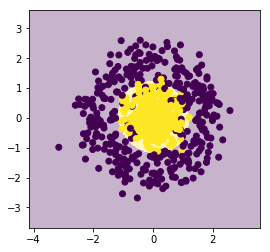

In [114]:
h = .02
x_min, x_max = standard_train[:, 0].min()-1 , standard_train[:, 0].max() +1
y_min, y_max = standard_train[:, 1].min()-1, standard_train[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.3)#,cmap='GnBu')
plt.scatter(standard_train[:,0], standard_train[:,1],c=np.ravel(train_targets))


## Zadanie 2

Znajdź optymalny klasyfikator dla sztucznie wygnerowanych danych z wykorzystaniem `datasets.make_moons`. W tym celu przeszukaj przestrzeń hiperparametrów dla klasyfikatorów kNN i SVM.

Na wykresach zwizualizuj działanie obu znalezionych klasyfikatorów.

In [ ]:
moons_data, moons_targers = datasets.make_moons(n_samples=1000, noise=.35, random_state=3)

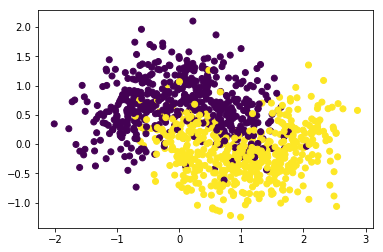

In [104]:
plt.scatter(moons_data[:,0], moons_data[:,1],c = np.ravel(moons_targers))

In [118]:

### BEGIN SOLUTION

X = moons_data

#Wektor poprawnej klasyfikacji obiektów
y = moons_targers
y = np.array(y)


#Dzielimy losowo zbiór na dwie części
train, test, train_targets, test_targets = train_test_split(X, y,
                                 test_size=0.30, random_state=1234)



scaler = preprocessing.StandardScaler(with_std = True)
scaler.fit(train)
clf = svm.SVC(C=1,kernel='rbf', gamma =0.5)

standard_train = scaler.transform(train)
standard_test = scaler.transform(test)

k = np.arange(20)+1
tuned_parameters = {'n_neighbors': k}

clf1 = GridSearchCV(KNeighborsClassifier(n_jobs=4), tuned_parameters, cv=5)
clf1.fit(standard_train, train_targets)

print("METODA kNN")
print("Zestaw najlepszych parametrów:")
print()
print(clf1.best_params_)
print()
print ("Błąd: ", clf1.best_score_)
print()
print("Wyniki")
print()
means = clf1.cv_results_['mean_test_score']
stds = clf1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) dla %r"
            % (mean, std * 2, params))
print()

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf2 = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf2.fit(standard_train, train_targets)

print("METODA SVM")
print("Zestaw najlepszych parametrów:")
print()
print(clf2.best_params_)

means = clf2.cv_results_['mean_test_score']
stds = clf2.cv_results_['std_test_score']
amax = np.argmax(means)
print ("Błąd: ", clf2.best_score_)
print()
print("Wyniki")
print()

for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) dla %r"
            % (mean, std * 2, params))
print()

### END SOLUTION


METODA kNN
Zestaw najlepszych parametrów:

{'n_neighbors': 13}

Błąd:  0.8985714285714286

Wyniki

0.844 (+/-0.029) dla {'n_neighbors': 1}
0.829 (+/-0.058) dla {'n_neighbors': 2}
0.874 (+/-0.035) dla {'n_neighbors': 3}
0.866 (+/-0.029) dla {'n_neighbors': 4}
0.886 (+/-0.035) dla {'n_neighbors': 5}
0.874 (+/-0.046) dla {'n_neighbors': 6}
0.890 (+/-0.037) dla {'n_neighbors': 7}
0.889 (+/-0.037) dla {'n_neighbors': 8}
0.894 (+/-0.047) dla {'n_neighbors': 9}
0.893 (+/-0.048) dla {'n_neighbors': 10}
0.896 (+/-0.052) dla {'n_neighbors': 11}
0.890 (+/-0.061) dla {'n_neighbors': 12}
0.899 (+/-0.051) dla {'n_neighbors': 13}
0.893 (+/-0.052) dla {'n_neighbors': 14}
0.894 (+/-0.048) dla {'n_neighbors': 15}
0.893 (+/-0.052) dla {'n_neighbors': 16}
0.896 (+/-0.044) dla {'n_neighbors': 17}
0.893 (+/-0.041) dla {'n_neighbors': 18}
0.894 (+/-0.047) dla {'n_neighbors': 19}
0.897 (+/-0.050) dla {'n_neighbors': 20}

METODA SVM
Zestaw najlepszych parametrów:

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Bł

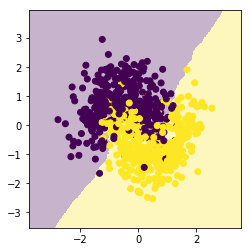

In [119]:
h = .02
x_min, x_max = standard_train[:, 0].min()-1 , standard_train[:, 0].max() +1
y_min, y_max = standard_train[:, 1].min()-1, standard_train[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.3)#,cmap='GnBu')
plt.scatter(standard_train[:,0], standard_train[:,1],c=np.ravel(train_targets))


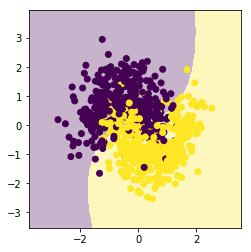

In [120]:
h = .02
x_min, x_max = standard_train[:, 0].min()-1 , standard_train[:, 0].max() +1
y_min, y_max = standard_train[:, 1].min()-1, standard_train[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.3)#,cmap='GnBu')
plt.scatter(standard_train[:,0], standard_train[:,1],c=np.ravel(train_targets))


## Zadanie 3

Wykonaj powyższą analizę dla danych o złośliwości raka piersi. Pobierz je z sklearn metodą `datasets.load_breast_cancer()`. Pomiń krok z rysowaniem wykresów.

In [126]:

### BEGIN SOLUTION


X = circles_data

#Wektor poprawnej klasyfikacji obiektów
y = circles_targers
y = np.array(y)


#Dzielimy losowo zbiór na dwie części
train, test, train_targets, test_targets = train_test_split(X, y,
                                 test_size=0.30, random_state=1234)



scaler = preprocessing.StandardScaler(with_std = True)
scaler.fit(train)

standard_train = scaler.transform(train)
standard_test = scaler.transform(test)

k = np.arange(20)+1
tuned_parameters = {'n_neighbors': k}

clf1 = GridSearchCV(KNeighborsClassifier(n_jobs=4), tuned_parameters, cv=5)
clf1.fit(standard_train, train_targets)

print("METODA kNN")
print("Zestaw najlepszych parametrów:")
print()
print(clf1.best_params_)
print()
print ("Błąd: ", clf1.best_score_)
print()
print("Wyniki")
print()
means = clf1.cv_results_['mean_test_score']
stds = clf1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) dla %r"
            % (mean, std * 2, params))
print()

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf2 = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf2.fit(standard_train, train_targets)

print("METODA SVM")
print("Zestaw najlepszych parametrów:")
print()
print(clf2.best_params_)

means = clf2.cv_results_['mean_test_score']
stds = clf2.cv_results_['std_test_score']
amax = np.argmax(means)
print ("Błąd: ", clf2.best_score_)
print()
print("Wyniki")
print()

for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) dla %r"
            % (mean, std * 2, params))
print()

### END SOLUTION


METODA kNN
Zestaw najlepszych parametrów:

{'n_neighbors': 19}

Błąd:  0.9485714285714286

Wyniki

0.924 (+/-0.021) dla {'n_neighbors': 1}
0.920 (+/-0.045) dla {'n_neighbors': 2}
0.934 (+/-0.024) dla {'n_neighbors': 3}
0.936 (+/-0.029) dla {'n_neighbors': 4}
0.943 (+/-0.018) dla {'n_neighbors': 5}
0.941 (+/-0.021) dla {'n_neighbors': 6}
0.939 (+/-0.023) dla {'n_neighbors': 7}
0.936 (+/-0.036) dla {'n_neighbors': 8}
0.939 (+/-0.021) dla {'n_neighbors': 9}
0.937 (+/-0.028) dla {'n_neighbors': 10}
0.940 (+/-0.029) dla {'n_neighbors': 11}
0.939 (+/-0.032) dla {'n_neighbors': 12}
0.944 (+/-0.026) dla {'n_neighbors': 13}
0.943 (+/-0.024) dla {'n_neighbors': 14}
0.944 (+/-0.023) dla {'n_neighbors': 15}
0.944 (+/-0.021) dla {'n_neighbors': 16}
0.943 (+/-0.018) dla {'n_neighbors': 17}
0.944 (+/-0.017) dla {'n_neighbors': 18}
0.949 (+/-0.016) dla {'n_neighbors': 19}
0.949 (+/-0.011) dla {'n_neighbors': 20}

METODA SVM
Zestaw najlepszych parametrów:

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Błą

## Zadanie domowe

Przeprowadź powyższą analizę dla danych MNIST.

In [ ]:
### BEGIN SOLUTION
pass
### END SOLUTION